In [2]:
import pandas as pd

In [3]:
df_csv = pd.read_csv('df_chn.csv',index_col=0)
df_csv

,msp_0001,msp_0002,msp_0003,msp_0004,msp_0005,msp_0006,msp_0007,msp_0008,msp_0009,msp_0010,...,msp_2178,msp_2180,msp_2191,msp_2195,msp_2196,msp_2207,msp_2209,msp_2210,msp_2211,health_status
ERS848618,0.0,0.0,0.000000e+00,0.0,1.552808e+08,0.0,0.000000e+00,0.000000e+00,6.948606e+06,1.083289e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
ERS848619,0.0,0.0,1.923740e+07,0.0,2.550404e+09,0.0,6.040953e+06,9.608026e+05,7.051971e+05,4.020733e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
ERS848620,0.0,0.0,4.459996e+07,0.0,2.702459e+07,0.0,5.676616e+08,8.623771e+05,6.176406e+06,5.150749e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
ERS848621,0.0,0.0,0.000000e+00,0.0,8.939921e+07,0.0,1.490348e+06,2.334092e+06,9.420152e+05,2.575010e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
ERS848622,0.0,0.0,4.901429e+07,0.0,1.429887e+08,0.0,3.024163e+06,0.000000e+00,5.091330e+07,1.334608e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERS848741,0.0,0.0,0.000000e+00,0.0,8.808569e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.868337e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
ERS848742,0.0,0.0,1.501126e+07,0.0,9.168722e+06,0.0,4.341670e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
ERS848743,0.0,0.0,1.591189e+07,0.0,5.206252e+08,0.0,0.000000e+00,0.000000e+00,1.994553e+06,4.233801e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
ERS848744,0.0,0.0,6.303137e+07,0.0,2.545203e+07,0.0,1.123042e+07,2.257191e+07,1.040832e+07,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P


In [4]:
#Questa funzione rimuove le colonne che contengono zero in più del percentage% dei campioni.
def drop_almost_zero(df, percentage):
    column_cut_off = int(percentage / 100 * len(df))  # massimo numero di zeri ammessi
    zero_counts = (df == 0).sum(axis=0)               # conta gli zeri per colonna
    df_filtered = df[zero_counts[zero_counts <= column_cut_off].index]
    return df_filtered

In [5]:
df_features = df_csv.drop(columns='health_status')
df_filtered = drop_almost_zero(df_features, percentage=90)


In [6]:
from skbio.stats.composition import multi_replace,clr
# STEP 2: sostituisci gli zeri con valori piccoli coerenti con il compositional data
X_arr = multi_replace(df_filtered)
# Applichi CLR
X_clr = pd.DataFrame(clr(X_arr), index=df_filtered.index, columns=df_filtered.columns)

In [8]:
# Costruzione di un DataFrame unificato per plotting
df_plot = X_clr.copy()
df_plot['health_status'] = df_csv['health_status'].values
df_plot

,msp_0003,msp_0005,msp_0007,msp_0008,msp_0009,msp_0010,msp_0011,msp_0012,msp_0013,msp_0014,...,msp_1702,msp_1714,msp_1724,msp_1748,msp_1783,msp_1790,msp_1814,msp_1854,msp_1901,health_status
ERS848618,0.357923,1.710074,0.357923,0.357923,-1.396620,-0.952575,-2.414082,-8.132580,0.357923,0.269727,...,-2.108164,0.357923,0.357923,0.357923,0.357923,0.357923,0.357923,0.357923,-1.405810,P
ERS848619,2.709159,7.596309,1.550864,-0.287684,-0.596976,3.446352,2.840773,3.768472,2.187953,0.052141,...,-2.635119,-2.635119,-0.192664,-2.635119,-2.635119,-2.635119,-2.635119,-2.635119,-2.635119,P
ERS848620,4.430488,3.929502,6.974280,0.484692,2.453491,-0.030688,5.761667,4.287023,-1.857022,-1.857022,...,1.161744,-1.857022,0.875312,2.140833,-1.857022,3.187758,-1.857022,-1.857022,-1.857022,P
ERS848621,-2.044034,4.741911,0.647809,1.096421,0.189065,3.497237,2.639839,4.589336,-2.044034,2.839838,...,-2.044034,-2.044034,3.794253,0.262333,2.360584,-2.044034,-2.044034,-2.044034,-2.044034,P
ERS848622,4.462104,5.532758,1.676627,-1.829218,4.500117,5.463800,4.394371,4.688932,-1.829218,-0.220883,...,-1.829218,2.417879,0.416362,-1.829218,-1.829218,-1.829218,-1.829218,-1.829218,2.860398,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERS848741,-1.825278,9.692150,-1.825278,-1.825278,-1.825278,0.488572,-1.710893,0.200195,-1.825278,-1.825278,...,1.202463,-1.825278,-1.825278,-1.825278,-1.825278,-1.825278,-1.825278,-1.825278,-1.825278,H
ERS848742,2.737170,2.244168,1.496629,-2.377336,-2.377336,-2.377336,3.535200,-1.145290,-2.377336,-0.831793,...,-0.162458,-2.377336,-0.045367,-2.377336,-2.377336,-2.377336,-2.377336,4.409832,-2.377336,H
ERS848743,3.083658,6.571622,-2.006123,-2.006123,1.007011,4.062277,3.661929,2.123537,5.940842,-2.006123,...,2.232404,1.133643,-2.006123,0.090726,-2.006123,-2.006123,1.693697,-2.006123,-2.006123,P
ERS848744,4.305528,3.398691,2.580521,3.278601,2.504501,-2.393998,5.385122,3.379052,-2.393998,0.039195,...,-2.393998,-2.393998,2.838006,0.379990,-2.393998,-2.393998,-2.393998,-2.393998,-2.393998,P


In [10]:
df_plot['health_status'] = df_plot['health_status'].replace({'H': 0, 'P': 1})


/var/folders/33/yp65m1l108jcjptn6hq_l35h0000gn/T/ipykernel_52316/2220257658.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot['health_status'] = df_plot['health_status'].replace({'H': 0, 'P': 1})


# Unsupervised ML

## task: applicare la Principal Component Analysis (PCA) ai dati trasformati con CLR per esplorare se esiste una separazione tra i gruppi di salute (health_status).

Usa la classe PCA dalla libreria sklearn.decomposition

Applica la PCA a X_clr (solo le feature, escludi la colonna health_status)

Costruisci un DataFrame con le due componenti principali

Puoi usare seaborn.scatterplot per visualizzare



## soluzione

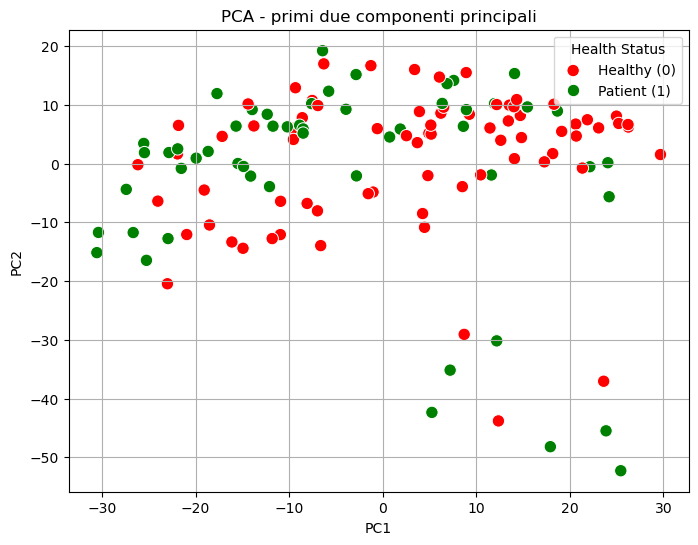

In [19]:
from sklearn.decomposition import PCA

# Esegui la PCA su X_clr (escludendo la colonna 'health_status')
X_pca = PCA(n_components=2).fit_transform(X_clr)

# Crea un DataFrame con le componenti principali
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['health_status'] = df_plot['health_status'].values  # Aggiungi label

# Visualizza il risultato
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='health_status',
    palette={0: 'green', 1: 'red'},s=80
)
plt.title("PCA - primi due componenti principali")
plt.grid(True)
plt.legend(title='Health Status', labels=['Healthy (0)', 'Patient (1)'])
plt.show()


In [13]:
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X_clr)
print("Varianza spiegata da PC1 e PC2:", pca_model.explained_variance_ratio_)


Varianza spiegata da PC1 e PC2: [0.09416523 0.07262454]


## PCoA

In [17]:
from scipy.spatial.distance import pdist, squareform
from skbio.stats.ordination import pcoa

# Calcolo della matrice di distanza euclidea
dist_matrix = squareform(pdist(X_clr.values, metric='euclidean'))

# Costruzione della DistanceMatrix skbio
from skbio import DistanceMatrix
dm = DistanceMatrix(dist_matrix, ids=X_clr.index)

# Applico la PCoA
pcoa_results = pcoa(dm)

# Costruisco il DataFrame per il plot
df_pcoa = pcoa_results.samples.copy()
df_pcoa['health_status'] = df_plot['health_status'].values


/var/folders/33/yp65m1l108jcjptn6hq_l35h0000gn/T/ipykernel_52316/3519686044.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PC1: {pcoa_results.proportion_explained[0]*100:.2f}%")
/var/folders/33/yp65m1l108jcjptn6hq_l35h0000gn/T/ipykernel_52316/3519686044.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PC2: {pcoa_results.proportion_explained[1]*100:.2f}%")


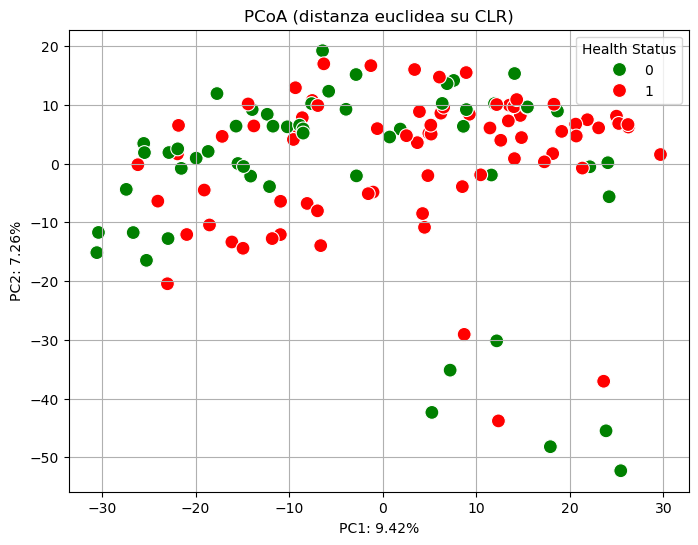

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_pcoa['PC1'],
    y=df_pcoa['PC2'],
    hue=df_pcoa['health_status'],
    palette={0: 'green', 1: 'red'},
    s=100
)
plt.xlabel(f"PC1: {pcoa_results.proportion_explained[0]*100:.2f}%")
plt.ylabel(f"PC2: {pcoa_results.proportion_explained[1]*100:.2f}%")
plt.title("PCoA (distanza euclidea su CLR)")
plt.grid(True)
plt.legend(title='Health Status')
plt.show()


## Clustering

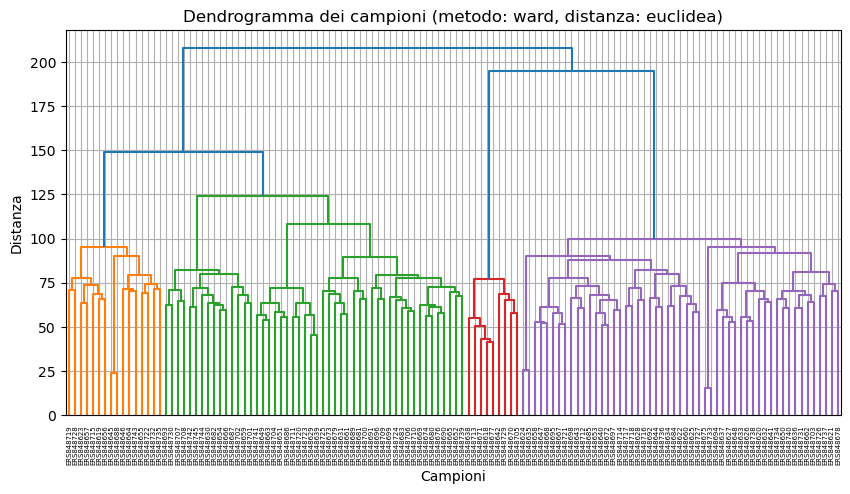

In [20]:
# visualizzare le relazioni tra i campioni in base alle loro composizioni CLR, usando una heatmap con dendrogramma (clustering gerarchico).

from scipy.spatial.distance import pdist, squareform

# Calcola le distanze euclidee tra i campioni
distance_matrix = pdist(X_clr, metric='euclidean')

from scipy.cluster.hierarchy import linkage, dendrogram

# Costruisci la matrice di linkage
Z = linkage(distance_matrix, method='ward')  # oppure: 'average', 'complete', etc.


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=X_clr.index.tolist())
plt.title("Dendrogramma dei campioni (metodo: ward, distanza: euclidea)")
plt.xlabel("Campioni")
plt.ylabel("Distanza")
plt.grid(True)
plt.show()


##  Clustermap: visualizzazione combinata di heatmap e clustering

In questo blocco eseguiamo una **clustermap** con `seaborn`, uno strumento che combina:

-  **Heatmap** dei valori di abbondanza (nel nostro caso: CLR-transformed)
-  **Clustering gerarchico** (dendrogrammi) sia per le **righe** (campioni) che per le **colonne** (feature)

La funzione `sns.clustermap()` calcola automaticamente:

1. Una **matrice di distanza** tra i campioni (qui: distanza euclidea)
2. Un **clustering gerarchico** con metodo di aggregazione (qui: `'ward'`)
3. Una **visualizzazione** che ordina le righe e le colonne in base alla struttura del dendrogramma

Questa rappresentazione è molto utile per:

- Identificare **gruppi di campioni simili** (es. pazienti vs sani)
- Individuare **pattern di co-variazione** tra feature (batteri che aumentano o diminuiscono insieme)



/Users/pierfrancesconovielli/conda/envs/ai-microbiome/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/pierfrancesconovielli/conda/envs/ai-microbiome/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


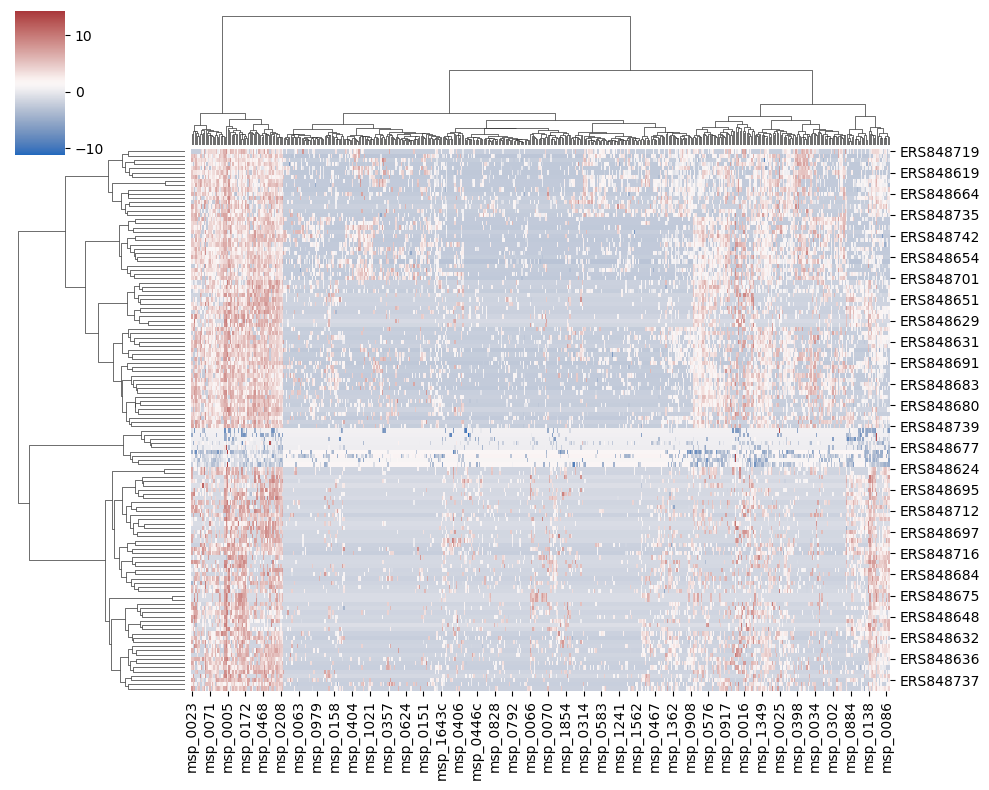

In [21]:
import seaborn as sns

sns.clustermap(
    X_clr, 
    metric='euclidean',
    method='ward',
    cmap='vlag',
    figsize=(10, 8),
    row_cluster=True,
    col_cluster=True
)


## k-means

 Clustering non supervisionato con K-Means

In questo esercizio, applicheremo l'algoritmo **K-Means** al dataset CLR per raggruppare i campioni in base alla loro composizione microbiomica.

 Obiettivo:
- Eseguire un clustering non supervisionato dei campioni.
- Visualizzare i risultati su uno spazio ridotto (es. tramite PCA).
- Confrontare i cluster ottenuti con i gruppi noti (`health_status`).

---

 Task

1. Applica il K-Means ai dati `X_clr` scegliendo un numero di cluster `k = 2`.
2. Aggiungi i cluster assegnati a un nuovo DataFrame.
3. Visualizza i risultati su un piano bidimensionale usando le componenti principali (PCA).
4. Confronta visivamente i cluster con lo `health_status`.



In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_clr)


In [24]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_clr)


In [26]:
df_kmeans = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])  # Usa le componenti già calcolate in precedenza
df_kmeans['Cluster'] = clusters
df_kmeans['Health Status'] = df_plot['health_status'].values
df_kmeans.head(5)

,PC1,PC2,Cluster,Health Status
0,8.710377,-29.076535,0,1
1,-23.002376,-20.457928,1,1
2,6.220237,8.587244,0,1
3,-8.074665,-6.782881,1,1
4,12.619664,3.969948,0,1


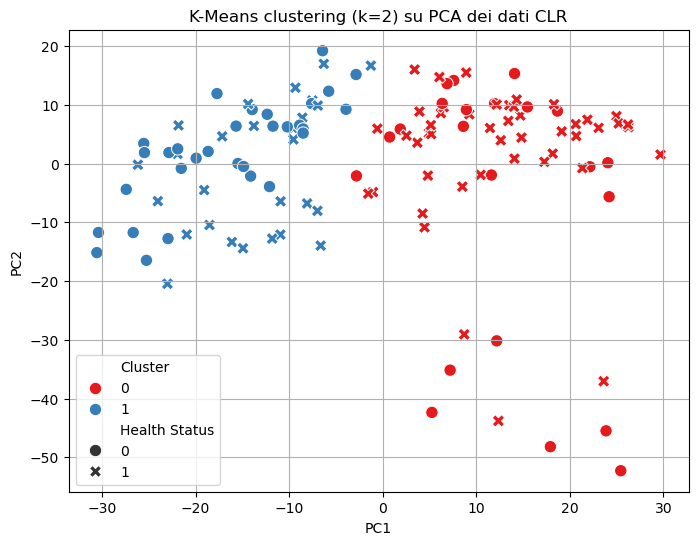

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans,
    x='PC1',
    y='PC2',
    hue='Cluster',
    style='Health Status',  # aggiungi questa linea per confronto
    palette='Set1',
    s=80
)
plt.title("K-Means clustering (k=2) su PCA dei dati CLR")
plt.grid(True)
plt.show()


# Supervised ML

In [29]:
X = X_clr  # feature CLR
y = df_plot['health_status']  # label binaria


##  Task: Suddivisione del dataset in training e test set

Prima di allenare un modello supervisionato, è fondamentale **dividere il dataset in due parti**:

- 🔧 **Training set**: il modello viene allenato su questi dati (70% del totale)
- 🧪 **Test set**: usato solo per valutare le prestazioni del modello (30%)

---

 🎯 Obiettivo:
Dividere `X` (le feature CLR) e `y` (la label `health_status`) in training e test set.

---

 📝 Task:
1. Usa `train_test_split` per dividere i dati.
2. Imposta la percentuale di test set al 30%.
3. Usa un `random_state=42` per rendere il risultato ripetibile.




## soluzione

In [30]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


## Regressione Logistica


Ora che abbiamo diviso i dati in **train** e **test**, possiamo allenare un primo modello supervisionato: la **regressione logistica**.

La regressione logistica è un modello semplice ma molto efficace per problemi di **classificazione binaria** come il nostro (`health_status`: 0 o 1).

---
  Obiettivo:
- Allenare un modello su `X_train`, `y_train`.
- Predire su `X_test`.
- Valutare le performance del modello.

---

 Task:
1. Importa `LogisticRegression` e allena il modello.
2. Usa il metodo `.predict()` per predire su `X_test`.
3. Calcola:
   - Accuracy
   - Classification report
   - Confusion matrix (con visualizzazione `seaborn`)



https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [51]:

# 📦 Librerie da importare
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
y_pred = model_lr.predict(X_test)


In [55]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Report con precision, recall, f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6410256410256411
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.67      0.59        15
           1       0.75      0.62      0.68        24

    accuracy                           0.64        39
   macro avg       0.64      0.65      0.64        39
weighted avg       0.66      0.64      0.65        39



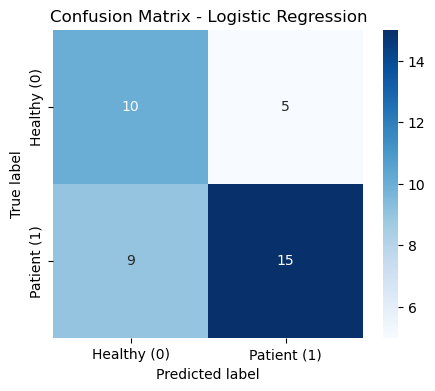

In [56]:
# Calcola la matrice di confusione
conf_mat = confusion_matrix(y_test, y_pred)

# Visualizzazione
plt.figure(figsize=(5, 4))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Healthy (0)', 'Patient (1)'],
    yticklabels=['Healthy (0)', 'Patient (1)']
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

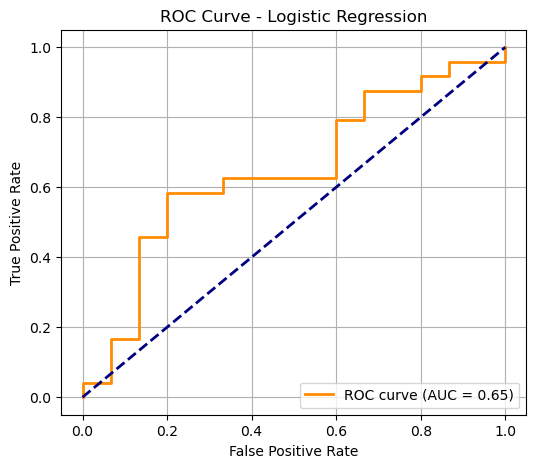

In [58]:
from sklearn.metrics import roc_curve, auc

# Ottieni le probabilità del test set (classe positiva = 1)
y_prob = model_lr.predict_proba(X_test)[:, 1]

# Calcola i valori di FPR, TPR e threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcola l'area sotto la curva ROC
roc_auc = auc(fpr, tpr)

# Visualizza la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonale random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Task: confronto tra modelli di ML (RF, SVM)

Ora che hai visto come funziona la regressione logistica, ripeti lo stesso procedimento con **altri tre modelli di machine learning**:

1.  **Random Forest**
2.  **Support Vector Machine (SVM)**


---

 🎯 Obiettivo per ciascun modello:
- Allenare il modello con `X_train`, `y_train`
- Predire con `.predict(X_test)`
- Valutare le performance con:
  - `accuracy_score`
  - `classification_report`
  - `confusion_matrix` (visualizzata con `seaborn`, etichette leggibili)

---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## soluzione

Random Forest - Accuracy: 0.5897435897435898
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.40      0.43        15
           1       0.65      0.71      0.68        24

    accuracy                           0.59        39
   macro avg       0.56      0.55      0.55        39
weighted avg       0.58      0.59      0.58        39



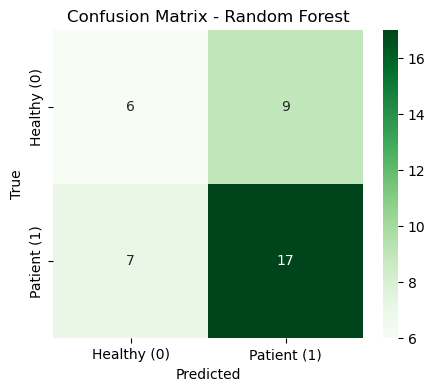

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Allenamento
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Valutazione
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Healthy (0)', 'Patient (1)'],
            yticklabels=['Healthy (0)', 'Patient (1)'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

SVM - Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.68      0.71      0.69        24

    accuracy                           0.62        39
   macro avg       0.59      0.59      0.59        39
weighted avg       0.61      0.62      0.61        39



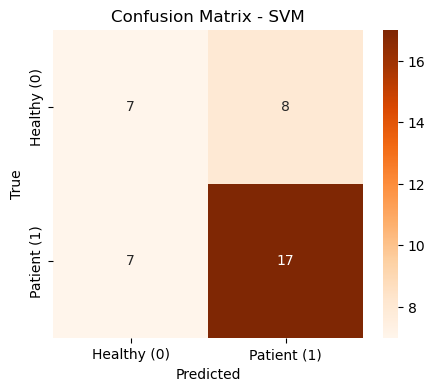

In [48]:
from sklearn.svm import SVC

# Allenamento
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Valutazione
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Healthy (0)', 'Patient (1)'],
            yticklabels=['Healthy (0)', 'Patient (1)'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Microbiome - autism

In [62]:
df_asd=pd.read_csv('df_autism.csv',index_col=0)
df_asd

,OTU,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
0,OTU1,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,OTU2,d__Bacteria;_k__norank;_p__Proteobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OTU3,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erys...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,OTU4,d__Bacteria;_k__norank;_p__Firmicutes;_c__Baci...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,OTU5,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mol...,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1318,OTU1335,d__Bacteria;_k__norank;_p__Actinobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,OTU1336,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,OTU1337,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
taxa = df_asd[['OTU', 'taxonomy']].set_index('OTU')
pd_abundance_T = df_asd.drop('taxonomy', axis=1).set_index('OTU').transpose()
pd_abundance_T

OTU,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU1329,OTU1330,OTU1331,OTU1332,OTU1333,OTU1334,OTU1335,OTU1336,OTU1337,OTU1338
A1,0,0,0,0,0,1,0,0,50,0,...,1,0,1,0,0,0,0,0,0,0
A10,0,0,0,0,0,0,0,0,10,2,...,5,0,0,0,0,0,0,0,0,0
A100,0,0,0,0,1,0,0,485,13,0,...,0,0,0,0,0,0,0,0,0,0
A101,0,0,0,0,0,0,1,142,17,0,...,0,1,0,0,0,0,0,0,0,0
A102,0,0,0,0,0,0,0,1,9,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B58,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B59,0,0,0,0,0,0,0,25,2,0,...,1,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,20,7,0,...,1,0,0,0,0,0,0,0,0,0
B60,0,0,0,1,0,0,1,0,13,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
target = pd_abundance_T.index.to_list()
binary_target = np.array([1 if t.startswith('A') else 0 for t in target ])

In [66]:

df_filtered = drop_almost_zero(pd_abundance_T, percentage=90)


In [67]:
from skbio.stats.composition import multi_replace,clr
# STEP 2: sostituisci gli zeri con valori piccoli coerenti con il compositional data
X_arr = multi_replace(df_filtered)
# Applichi CLR
X_clr = pd.DataFrame(clr(X_arr), index=df_filtered.index, columns=df_filtered.columns)

In [110]:
#X e y
X=X_clr
y=binary_target 

In [111]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


Random Forest - Accuracy: 0.922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.91      0.95      0.93        42

    accuracy                           0.92        77
   macro avg       0.92      0.92      0.92        77
weighted avg       0.92      0.92      0.92        77



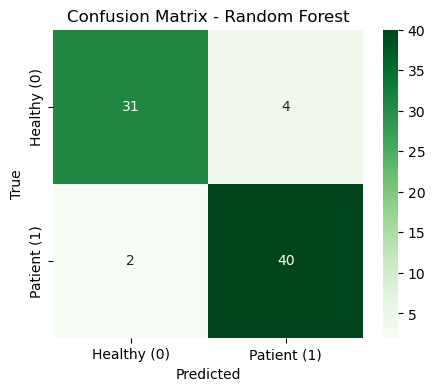

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Allenamento
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Valutazione
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Healthy (0)', 'Patient (1)'],
            yticklabels=['Healthy (0)', 'Patient (1)'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

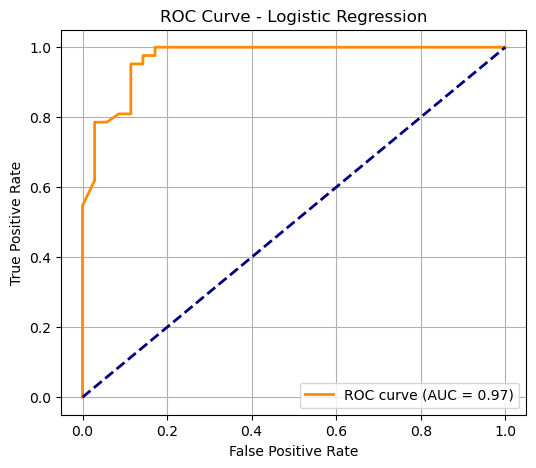

In [113]:
from sklearn.metrics import roc_curve, auc

# Ottieni le probabilità del test set (classe positiva = 1)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calcola i valori di FPR, TPR e threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcola l'area sotto la curva ROC
roc_auc = auc(fpr, tpr)

# Visualizza la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonale random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# XAI: SHAP values
Utilizzare SHAP per spiegare le predizioni di un modello di classificazione binaria addestrato (es. Random Forest o XGBoost).

https://shap.readthedocs.io/en/latest/

In [114]:
import shap
import matplotlib.pyplot as plt


Inizializza l’explainer

In [115]:
explainer = shap.TreeExplainer(model_rf, X_train)


Calcola i valori SHAP per il test set

In [116]:
shap_values = explainer(X_test).values[:,:,1]


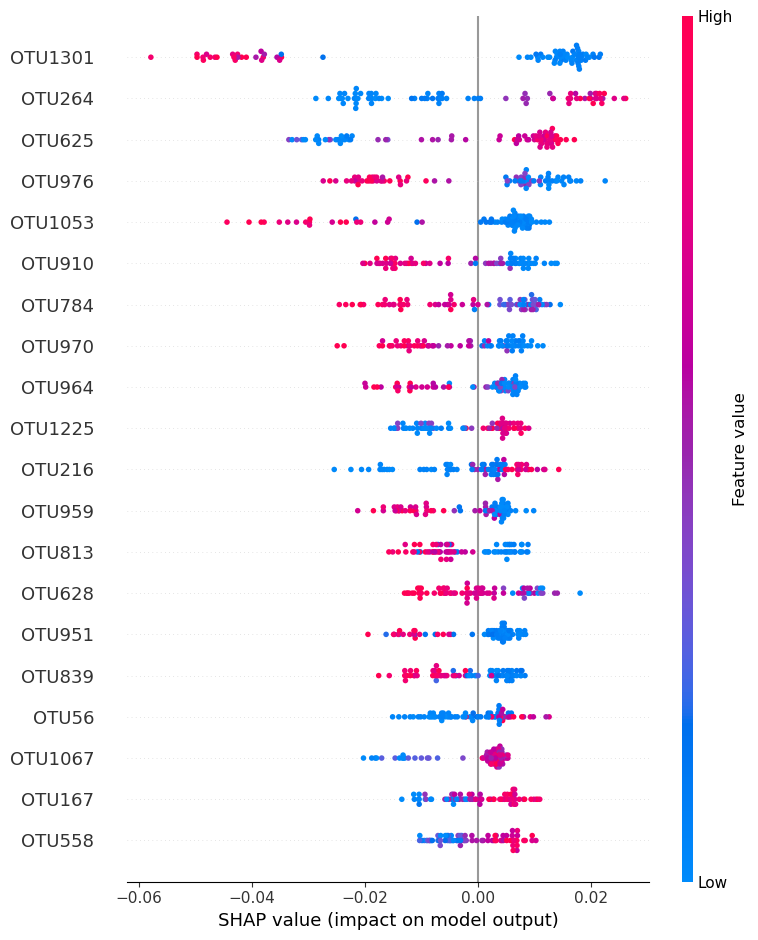

In [117]:
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)
